In [2]:
import numpy as np
import pandas as pd 
import datetime as dt
import matplotlib.pyplot as plt

C:\Users\faruq\AppData\Local\Temp\ipykernel_13252\1285305776.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [3]:
# load the data
customer_df = pd.read_csv('dataset/customer.csv')
customer_df['birthdate'] = pd.to_datetime(customer_df['birthdate'])

In [4]:
# add age column
customer_df['date_now'] = dt.datetime(2023,1,1)
customer_df['age'] = (customer_df['date_now'].dt.year - customer_df['birthdate'].dt.year) - ((customer_df['date_now'].dt.month - customer_df['birthdate'].dt.month) < 0)
customer_df = customer_df.drop('date_now', axis=1, inplace=False)
customer_df.head(5)

,customer_id,first_name,last_name,username,email,gender,birthdate,device_type,device_id,device_version,home_location_lat,home_location_long,home_location,home_country,first_join_date,age
0,2870,Lala,Maryati,671a0865-ac4e-4dc4-9c4f-c286a1176f7e,671a0865_ac4e_4dc4_9c4f_c286a1176f7e@startupca...,F,1996-06-14,iOS,c9c0de76-0a6c-4ac2-843f-65264ab9fe63,iPhone; CPU iPhone OS 14_2_1 like Mac OS X,-1.043345,101.360523,Sumatera Barat,Indonesia,2019-07-21,26
1,8193,Maimunah,Laksmiwati,83be2ba7-8133-48a4-bbcb-b46a2762473f,83be2ba7_8133_48a4_bbcb_b46a2762473f@zakyfound...,F,1993-08-16,Android,fb331c3d-f42e-40fe-afe2-b4b73a8a6e25,Android 2.2.1,-6.212489,106.818850,Jakarta Raya,Indonesia,2017-07-16,29
2,7279,Bakiman,Simanjuntak,3250e5a3-1d23-4675-a647-3281879d42be,3250e5a3_1d23_4675_a647_3281879d42be@startupca...,M,1989-01-23,iOS,d13dde0a-6ae1-43c3-83a7-11bbb922730b,iPad; CPU iPad OS 4_2_1 like Mac OS X,-8.631607,116.428436,Nusa Tenggara Barat,Indonesia,2020-08-23,34
3,88813,Cahyadi,Maheswara,df797edf-b465-4a80-973b-9fbb612260c2,df797edf_b465_4a80_973b_9fbb612260c2@zakyfound...,M,1991-01-05,iOS,f4c18515-c5be-419f-8142-f037be47c9cd,iPad; CPU iPad OS 14_2 like Mac OS X,1.299332,115.774934,Kalimantan Timur,Indonesia,2021-10-03,32
4,82542,Irnanto,Wijaya,36ab08e1-03de-42a8-9e3b-59528c798824,36ab08e1_03de_42a8_9e3b_59528c798824@startupca...,M,2000-07-15,iOS,e46e4c36-4630-4736-8fcf-663db29ca3b0,iPhone; CPU iPhone OS 10_3_3 like Mac OS X,-2.980807,114.924675,Kalimantan Selatan,Indonesia,2021-04-11,22


#  **About the data**
> 
> **Customer_df is about all the customers detail such as id, first name, etc. Here is the columns detail:**
> 1. customer_id : this column consist id for each customer.
> 2. first_name : first name of the customer.
> 3. last_name : last name of the customer.
> 4. username : the username of customer that they registered for their accounts.
> 5. email : the email of customer that they registered for their accounts.
> 6. gender : gender of the customer.      
> 7. birthdate : customers birthday.
> 8. device_type : device of customer that they used for registering their accounts.       
> 9. device_id : id of customers device that they used for registering their accounts.
> 10. device_version : version of customers device that they used for registering their accounts.       
> 11. home_location_lat : home latitdude of customers.   
> 12. home_location_long : home longtitude of customers.
> 13. home_location : home location of customers.       
> 14. home_country : country where customers lived.      
> 15. first_join_date : the date when customers registered their accounts.

In [5]:
# EDA
customer_df['age'].describe().round()

count    100000.0
mean         27.0
std           7.0
min           6.0
25%          21.0
50%          26.0
75%          31.0
max          68.0
Name: age, dtype: float64

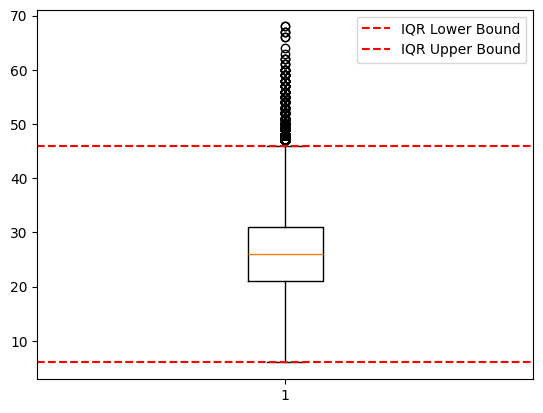

In [6]:
Q1 = np.percentile(customer_df['age'], 25)
Q3 = np.percentile(customer_df['age'], 75)
IQR = Q3 - Q1
plt.boxplot(customer_df['age'])
plt.axhline(y=Q1 - 1.5 * IQR, color='red', linestyle='--', label='IQR Lower Bound')
plt.axhline(y=Q3 + 1.5 * IQR, color='red', linestyle='--', label='IQR Upper Bound')
plt.legend()
plt.show()

Mean the age of the total customer is 27 years old. The youngest one is 6 and the oldest is 68. In the graph above we can see that a few data is outside the red line (interquartile treshold), but i think its not included as an outliers, because the outliers is still make senses. And its not the type of outliers where is located very far from the other data. So its not considered as an outliers.

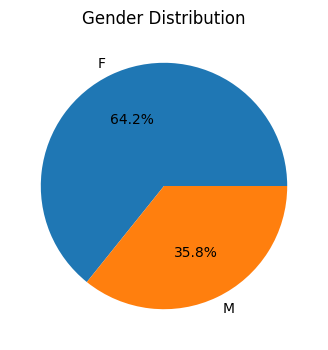

In [7]:
plt.figure(figsize=(4, 4))
plt.pie(customer_df['gender'].value_counts(), labels=customer_df['gender'].unique(), autopct="%1.1f%%")
plt.title("Gender Distribution")
plt.show()

In [8]:
product_df = pd.read_csv('dataset/product.csv', usecols=[0,1,2,3,4,5,6,7,8,9])
product_df['year'] = pd.to_datetime(product_df['year'], format='%Y').dt.year
product_df

,id,gender,masterCategory,subCategory,articleType,baseColour,season,year,usage,productDisplayName
0,15970,Men,Apparel,Topwear,Shirts,Navy Blue,Fall,2011.0,Casual,Turtle Check Men Navy Blue Shirt
1,39386,Men,Apparel,Bottomwear,Jeans,Blue,Summer,2012.0,Casual,Peter England Men Party Blue Jeans
2,59263,Women,Accessories,Watches,Watches,Silver,Winter,2016.0,Casual,Titan Women Silver Watch
3,21379,Men,Apparel,Bottomwear,Track Pants,Black,Fall,2011.0,Casual,Manchester United Men Solid Black Track Pants
4,53759,Men,Apparel,Topwear,Tshirts,Grey,Summer,2012.0,Casual,Puma Men Grey T-shirt
...,...,...,...,...,...,...,...,...,...,...
44441,17036,Men,Footwear,Shoes,Casual Shoes,White,Summer,2013.0,Casual,Gas Men Caddy Casual Shoe
44442,6461,Men,Footwear,Flip Flops,Flip Flops,Red,Summer,2011.0,Casual,Lotto Men's Soccer Track Flip Flop
44443,18842,Men,Apparel,Topwear,Tshirts,Blue,Fall,2011.0,Casual,Puma Men Graphic Stellar Blue Tshirt
44444,46694,Women,Personal Care,Fragrance,Perfume and Body Mist,Blue,Spring,2017.0,Casual,Rasasi Women Blue Lady Perfume


#  **About the data**
> 
> **product_df is about all the products detail such as id, gender, masterCatogory, etc. Here is the columns detail:**
> 1. id : the id product.
> 2. gender : what gender did the product sold to.  
> 3. masterCategory : master / main category of the product.
> 4. subCategory : sub category of the product.
> 5. articleType : what kind of product it is.
> 6. baseColour : color of the product.    
> 7. season : what season of the product is suitable to wear.
> 8. year : what year did the product is released.
> 9. usage : what type of product is.
> 10. productDisplayName : the name of the product.   

In [9]:
transactions_df = pd.read_csv('dataset/transaction_new.csv')

# convert created_at column to datetime type
transactions_df['created_at'] = pd.to_datetime(transactions_df['created_at'])
transactions_df.head(5)

,created_at,customer_id,booking_id,session_id,payment_method,payment_status,promo_amount,promo_code,shipment_fee,shipment_date_limit,shipment_location_lat,shipment_location_long,total_amount,product_id,quantity,item_price
0,2018-07-29 15:22:01.458193+00:00,5868,186e2bee-0637-4710-8981-50c2d737bc42,3abaa6ce-e320-4e51-9469-d9f3fa328e86,Debit Card,Success,1415,WEEKENDSERU,10000,2018-08-03T05:07:24.812676Z,-8.227893,111.969107,199832,54728,1,191247
1,2018-07-30 12:40:22.365620+00:00,4774,caadb57b-e808-4f94-9e96-8a7d4c9898db,2ee5ead1-f13e-4759-92df-7ff48475e970,Credit Card,Success,0,NaN,10000,2018-08-03T01:29:03.415705Z,3.013470,107.802514,155526,16193,1,145526
2,2018-09-15 11:51:17.365620+00:00,4774,6000fffb-9c1a-4f4a-9296-bc8f6b622b50,93325fb6-eb00-4268-bb0e-6471795a0ad0,OVO,Success,0,NaN,10000,2018-09-18T08:41:49.422380Z,-2.579428,115.743885,550696,53686,4,135174
3,2018-11-01 11:23:48.365620+00:00,4774,f5e530a7-4350-4cd1-a3bc-525b5037bcab,bcad5a61-1b67-448d-8ff4-781d67bc56e4,Credit Card,Success,0,NaN,0,2018-11-05T17:42:27.954235Z,-3.602334,120.363824,271012,20228,1,271012
4,2018-12-18 11:20:30.365620+00:00,4774,0efc0594-dbbf-4f9a-b0b0-a488cfddf8a2,df1042ab-13e6-4072-b9d2-64a81974c51a,Credit Card,Success,0,NaN,0,2018-12-23T17:24:07.361785Z,-3.602334,120.363824,198753,55220,1,198753


In [10]:
drop_column_1 = ['booking_id','session_id', 'shipment_location_lat', 'shipment_location_long', 'shipment_date_limit']
transactions_df = transactions_df.drop(drop_column_1, axis=1, inplace=False)

In [11]:
transactions_df['payment_status'].unique()

array(['Success', 'Failed'], dtype=object)

In [12]:
transactions_df['item_price'].describe()

count    1.254585e+06
mean     2.499744e+05
std      1.118733e+05
min      5.600000e+03
25%      1.683730e+05
50%      2.335400e+05
75%      3.136470e+05
max      1.200357e+06
Name: item_price, dtype: float64

#  **About the data**
> 
> **transaction_df is about all the transactions detail such as created_at, customer_id, booking_id, etc. Here is the columns detail:**
> 1. created_at : when the transaction is created. (year : 2016 - 2022)
> 2. customer_id : id of customer who did the transaction.  
> 3. booking_id : id of the booking process.
> 4. session_id : id of the session when the transaction is done.
> 5. payment_method : payment method that customer used in this transaction.
> 6. payment_status : status of the payment. 
> 7. promo_amount : amount of the promo.
> 8. promo_code : code of the promo.
> 9. shipment_fee : total amount of shipment fee for transaction.
> 10. shipment_date_limit : the limit date of shipment process.
> 11. shipment_location_lat : latitude of the location that the product is delivered.
> 12. shipment_location_long : longitude of the location that the product is delivered.
> 13. total_amount : total amount of transaction.
> 14. product_id : id of the product that customer buy.
> 15. quantity : quantity of the product that customer buy.
> 16. item_price : price for one product. 

# Time to Analyze the data

Before analyze the data, we need to make the question about what we want to know, what kind of problem we need to solve, what insights that we want to achieve from this data, so the top level manager can make a good decision for the next.

1. Which year has the most total amount of transactions. (Show all the year and sort by the total amount of transactions)
2. Based on best year on task 1, which month has the highest total amount of transactions.
3. In the last two years what articleType gaining the most amount transaction
4. Based on task 3 top category, what displayName that contribute the most.
5. Compare the total transactions for each articleType in 2020 and 2021. Give the status which articleType is declined or increased.
6. Show top 5 payment method used for transaction
7. Doing RFM Analysis for each customer.


In [13]:
customer_mod = customer_df.copy()
product_mod = product_df.copy()
transactions_mod = transactions_df.copy()

# TASK 1
Which year has the most total amount of transactions. (Show all the year and sort by the total amount of transactions)

In [14]:
transactions_1 = np.where(transactions_mod['payment_status'] == 'Success')
transactions_success = transactions_mod.loc[transactions_1]

In [15]:
transactions_success.groupby(transactions_success.created_at.dt.year)['total_amount'].sum().sort_values(ascending=False)

created_at
2021    429383978809
2022    322022908296
2020    291555933197
2019    190597047961
2018    123668474077
2017     55759340665
2016      8172407708
Name: total_amount, dtype: int64

> Year with the most total amount of transactions is on 2021, while the least is on 2016. And the trend is always increased every year, but on 2022 the value is decreased. This is why we need to investigate why its decreased.

In [16]:
transactions_success.groupby(transactions_success.created_at.dt.year)['created_at'].max()

created_at
2016   2016-12-31 23:50:42.749800+00:00
2017   2017-12-31 23:37:56.066875+00:00
2018   2018-12-31 23:57:09.868143+00:00
2019   2019-12-31 23:59:58.306015+00:00
2020   2020-12-31 23:55:31.580336+00:00
2021   2021-12-31 23:59:43.528545+00:00
2022   2022-07-31 23:59:19.821469+00:00
Name: created_at, dtype: datetime64[ns, UTC]

> After investigated, the reason why total amount is, decreased because max date of transactions in 2022 is not fully in one year, its only end in July. Thats why its decreased.

# TASK 2
Based on best year on task 1, which month has the highest total amount of transactions.


In [17]:
transactions_2 = np.where((transactions_mod['created_at'].dt.year == 2021) & (transactions_mod['payment_status'] == 'Success'))
transactions_2021 = transactions_mod.loc[transactions_2]

In [18]:
transactions_2021.groupby(transactions_2021.created_at.dt.month)['total_amount'].sum().sort_values(ascending=False).to_frame()

,total_amount
created_at,
12,42237719576
11,41023472667
10,41009446707
9,38843842106
8,38511134573
7,35002246680
5,34511063927
6,34034269691
4,33662253382


# TASK 3
In the last two years what articleType gaining the most amount transaction (TOP 10)

In [19]:
transactions_product = pd.merge(transactions_success,product_mod, how='left', left_on='product_id', right_on='id')

In [20]:
transactions_product.groupby(transactions_product.articleType)['total_amount'].sum().sort_values(ascending=False).to_frame().head(10)

,total_amount
articleType,
Tshirts,225664204213
Shirts,102268587302
Casual Shoes,90914635718
Watches,81165971028
Sports Shoes,65725213876
Kurtas,59423822342
Handbags,56666123795
Tops,55782293563
Heels,42441440848


# TASK 4
Based on task 3 top category, what displayName that contribute the most.

In [21]:
transprod_1 = np.where((transactions_product['articleType'] == 'Tshirts') & (transactions_mod['payment_status'] == 'Success'))
transactions_display = transactions_product.loc[transprod_1]

In [22]:
transactions_display.groupby(transactions_display.productDisplayName)['total_amount'].sum().sort_values(ascending=False).to_frame().head(10)

,total_amount
productDisplayName,
Puma Men Black T-shirt,575915926
ADIDAS Men Black T-shirt,509137777
French Connection Men White Printed T-shirt,438138399
ADIDAS Men White T-shirt,416424218
ADIDAS Men Navy Blue T-shirt,364874350
Gini and Jony Boys Printed White T-shirt,336656598
ADIDAS Men Blue T-shirt,332092147
Proline Men Grey Polo T-shirt,330099824
French Connection Men Grey T-shirt,317112356


# TASK 5
Compare the total transactions for each articleType in 2020 and 2021. Give the status which articleType is declined or increased.


In [23]:
transactions_product_1 = np.where((transactions_product['created_at'].dt.year == 2020) | (transactions_product['created_at'].dt.year == 2021) & (transactions_product['payment_status'] == 'Success'))
transactions_product_2122 = transactions_product.loc[transactions_product_1]

In [24]:
transactions_product_2122['year_created_at'] = transactions_product_2122['created_at'].dt.year

In [25]:
grouped_amount = transactions_product_2122.groupby(['year_created_at','articleType'])['total_amount'].sum().reset_index()


In [26]:
diff_transactions = grouped_amount.pivot(index='articleType', columns='year_created_at', values='total_amount')
diff_transactions.rename(columns=lambda x: f"year_{x}", inplace=True)
diff_transactions['diff'] = diff_transactions['year_2021'] - diff_transactions['year_2020']
diff_transactions

year_created_at,year_2020,year_2021,diff
articleType,,,
Accessory Gift Set,749010411,1135604564,386594153
Baby Dolls,82461133,149763785,67302652
Backpacks,4665372972,6856060692,2190687720
Bangle,627758374,815837723,188079349
Basketballs,51517844,181474235,129956391
...,...,...,...
Waistcoat,91579464,170084997,78505533
Wallets,5844949590,9301817443,3456867853
Watches,16805786007,24489775369,7683989362


In [27]:
def check_diff(column):
    if column > 0:
        return 'Increased'
    else:
        return 'Decreased'

diff_transactions['diff_status'] = diff_transactions['diff'].apply(check_diff)
diff_transactions

year_created_at,year_2020,year_2021,diff,diff_status
articleType,,,,
Accessory Gift Set,749010411,1135604564,386594153,Increased
Baby Dolls,82461133,149763785,67302652,Increased
Backpacks,4665372972,6856060692,2190687720,Increased
Bangle,627758374,815837723,188079349,Increased
Basketballs,51517844,181474235,129956391,Increased
...,...,...,...,...
Waistcoat,91579464,170084997,78505533,Increased
Wallets,5844949590,9301817443,3456867853,Increased
Watches,16805786007,24489775369,7683989362,Increased


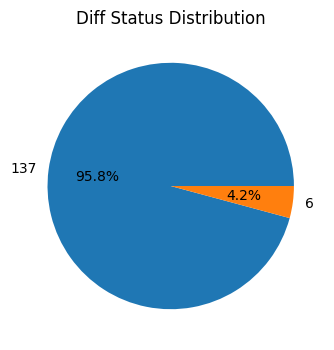

In [28]:
plt.figure(figsize=(4, 4))
plt.pie(diff_transactions['diff_status'].value_counts(), labels=diff_transactions['diff_status'].value_counts(), autopct="%1.1f%%")
plt.title("Diff Status Distribution")
plt.show()

In [29]:
diff_transactions[diff_transactions['diff_status'] == 'Decreased']

year_created_at,year_2020,year_2021,diff,diff_status
articleType,,,,
Hair Colour,134729959,129587644,-5142315,Decreased
Ipad,13041470,11415274,-1626196,Decreased
Shoe Laces,6850800,1790943,-5059857,Decreased
Swimwear,153189219,126003337,-27185882,Decreased
Ties and Cufflinks,19339185,6691644,-12647541,Decreased
Trolley Bag,20121527,19452682,-668845,Decreased


# TASK 6
Show payment method most used for transaction


In [30]:
payment_1 = transactions_mod.groupby(transactions_mod.payment_method).agg({
    'payment_method':['count'],
    'total_amount':['sum']
}).sort_values(by=('payment_method','count'), ascending=False)
payment_1

,payment_method,total_amount
,count,sum
payment_method,,
Credit Card,439876,515302691270
Gopay,251577,294494064526
OVO,249065,295707754735
Debit Card,202552,241588159114
LinkAja,111515,135292048933


# TASK 7
Doing RFM Analysis for each customer.

In [31]:
customer_transactions = pd.merge(transactions_success,customer_mod, how='left', on='customer_id')
customer_transactions['full_name'] = customer_transactions['first_name'] + ' ' + customer_transactions['last_name']


In [32]:
rfm_table = customer_transactions.groupby(customer_transactions.full_name).agg(
    monetary=('total_amount','sum'),
    avgmonetary=('total_amount','mean'),
    frequency=('customer_id','count'),
    last_order_date=('created_at','max'))

In [33]:
rfm_table['max_order_date'] = customer_transactions['created_at'].max()
rfm_table['recency'] = rfm_table['max_order_date'] - rfm_table['last_order_date']
rfm_table['avgmonetary'] = rfm_table['avgmonetary'].round(0)

In [34]:
rfm_table['recency'] = rfm_table['recency'].dt.days

In [35]:
# data binning in 4 quantile
def binning_rev(column,n):
    bin = n - pd.qcut(column, n, labels=False)
    return bin 

def binning(column,n):
    bin = pd.qcut(column, n, labels=False)
    return bin + 1


# binning monetary
rfm_table['rfm_monetary'] = binning(rfm_table['monetary'],4)

#binning frequency
rfm_table['rfm_frequency'] = binning(rfm_table['frequency'],4)

# binning recency
rfm_table['rfm_recency'] = binning_rev(rfm_table['recency'],4)


In [36]:
rfm_table['rfm_cell'] = rfm_table['rfm_monetary'] + rfm_table['rfm_frequency'] + rfm_table['rfm_recency']

In [37]:
rfm_table['rfm_cell_string'] = rfm_table['rfm_monetary'].astype(str) + rfm_table['rfm_frequency'].astype(str) + rfm_table['rfm_recency'].astype(str)

In [38]:
def check_status(x):
    segment_mapping = {
   'lost_customers': ['111', '112', '121', '122', '123', '132', '211', '212', '114', '141'],
   'slipping away, cannot lose' : ['133', '134', '143', '244', '334', '343', '344', '144'],
   'new customers' : ['311', '411', '331'],
   'potential churners' : ['222', '223', '233', '322'],
   'active' : ['323', '333', '321', '422', '332', '432'],
   'loyal' : ['433', '434', '443', '444']
}
    for segment_mapping,keywords in segment_mapping.items():
        for keyword in keywords:
            if keyword in x:
                return segment_mapping


rfm_table['rfm_segment'] = rfm_table['rfm_cell_string'].apply(check_status)

In [41]:
rfm_table.groupby(rfm_table.rfm_segment)['rfm_segment'].count().sort_values(ascending=False).to_frame()

,rfm_segment
rfm_segment,
lost_customers,7581
loyal,6334
active,4371
potential churners,4150
"slipping away, cannot lose",2505
new customers,64


So, from the previously created rfm segment, it will be initiated or labeled. For the segemntation itself, there are 6 types:

> 1. Lost customers are customers whose last transaction date is very far adrift from the current date (recency).
> 2. Slipping away, cannot lose are customers whose frequency of transactions (frequency) and the amount of transactions (monetary) are quite high, but do not or rarely make current transactions.
> 3. New customers are customers whose last transaction date is close to the current date (recency) but for frequency (frequency) or the number of transactions (monetary) is still relatively low.
> 4. Potentional churners are customers who have the potential to disappear or stop. This can be seen from the level of transaction frequency (frequency) and the number of transactions (monetary) still looks normal, but has started to rarely make transactions again lately.
> 5. Active are customers who often make transactions lately, although the number of transactions (monetary) is still quite low.
> 6. Loyal is a customer who in terms of the last transaction date (Recency), transaction frequency (frequency) and transaction amount (monetary) is very high compared to other customers.